In [9]:
#Gerekli Kütüphanelerin Projeye Dahil Edilmesi
import math
import pandas as pd
import numpy as np
import os
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
style.use('ggplot')
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
import sklearn
from sklearn.metrics import mean_squared_error

In [10]:
data=pd.read_csv("GlobalLandTemperaturesByCountry.csv")
data.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [11]:
turkey=data.loc[data['Country']=="Turkey"]
print(type(turkey))
turkey.infer_objects()

<class 'pandas.core.frame.DataFrame'>


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
533683,1777-02-01,3.000,3.314,Turkey
533684,1777-03-01,NaN,NaN,Turkey
533685,1777-04-01,7.678,2.553,Turkey
533686,1777-05-01,15.293,3.189,Turkey
533687,1777-06-01,18.661,2.993,Turkey
...,...,...,...,...
536518,2013-05-01,17.522,0.360,Turkey
536519,2013-06-01,20.862,0.240,Turkey
536520,2013-07-01,23.335,0.281,Turkey
536521,2013-08-01,23.839,0.306,Turkey


In [12]:
temperature=turkey['AverageTemperature']
temperature=temperature.dropna(how='any')

array([-1.08922851, -0.49890571,  0.46204087, ...,  1.1648001 ,
        1.47687113,  1.54047153])

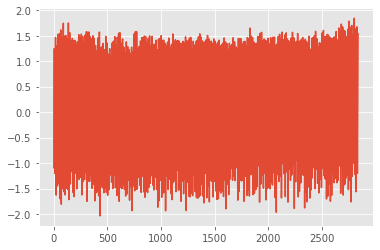

In [13]:
scale=preprocessing.scale(temperature)
plt.plot(scale)
scale

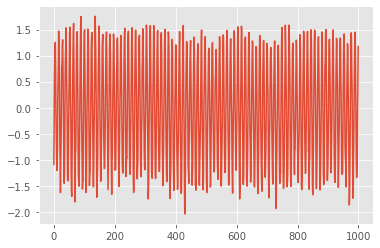

In [14]:
df=DataFrame(scale)
sample=df[0:1000]
sample
plt.plot(sample)

In [15]:
X=sample.values
X
train, test = X[0:700], X[700:]

RMSE: 0.550


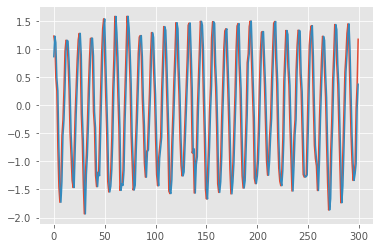

0.550159350795316

In [16]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
 predictions.append(history[-1])
 history.append(test[i])
    
rmse = math.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()
rmse

In [17]:
sample2=sample[0:100]
X2=sample2.values
X2
train2, test2 = X2[0:70], X2[70:]

RMSE: 0.607


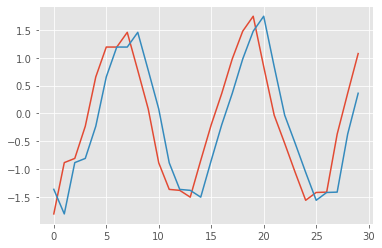

0.6073635673763564

In [18]:
history2 = [x for x in train2]
predictions2 = list()
for i in range(len(test2)):
    predictions2.append(history2[-1])
    history2.append(test2[i])
rmse2 = math.sqrt(mean_squared_error(test2, predictions2))
print('RMSE: %.3f' % rmse2)
pyplot.plot(test2)
pyplot.plot(predictions2)
pyplot.show()
rmse2

# Ülkeleye Göre Hava Durumu İstatistikleri

In [19]:
temperatureByCountry=pd.read_csv('GlobalLandTemperaturesByCountry.csv')
countries=temperatureByCountry['Country'].unique()

In [20]:
import seaborn as sns

In [21]:
max_min_list=[]
for country in countries:
    current_temps=temperatureByCountry[temperatureByCountry['Country'] ==country]['AverageTemperature']
    max_min_list.append((current_temps.max(), current_temps.min()))

In [22]:
res_max_min_list = []
res_countries = []
for i in range(len(max_min_list)):
 if not np.isnan(max_min_list[i][0]):
     res_max_min_list.append(max_min_list[i])
     res_countries.append(countries[i])

In [23]:
differences = []
for tpl in res_max_min_list:
 differences.append(tpl[0] - tpl[1])

In [24]:
differences, res_countries = (list(x) for x in zip(*sorted(zip(differences,
res_countries), key=lambda pair: pair[0], reverse=True)))

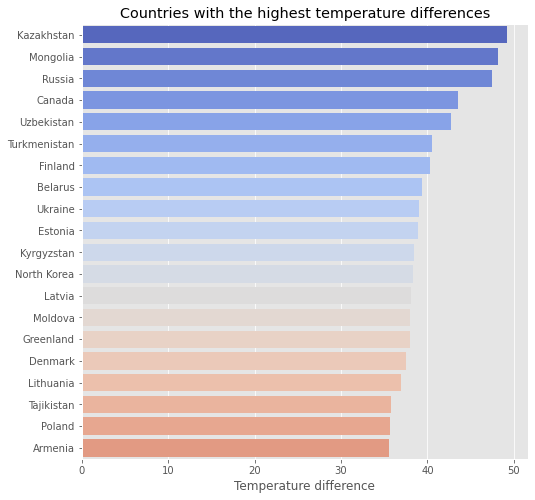

In [25]:
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:20], y=res_countries[:20],
palette=sns.color_palette("coolwarm", 25), ax=ax)
texts = ax.set(ylabel="", xlabel="Temperature difference", title="Countries with the highest temperature differences")

# LİNEER REGRESYON İLE ANKARA HAVA DURUMU TAHMİNİ

In [26]:
dframe= pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df_an = dframe[dframe['City']=='Ankara']
df_an= df_an.iloc[:, :2]
df_an.head(10)

,dt,AverageTemperature
11893,1755-01-01,-3.657
11894,1755-02-01,-2.453
11895,1755-03-01,4.458
11896,1755-04-01,NaN
11897,1755-05-01,NaN
11898,1755-06-01,21.018
11899,1755-07-01,22.099
11900,1755-08-01,20.793
11901,1755-09-01,17.085
11902,1755-10-01,11.088


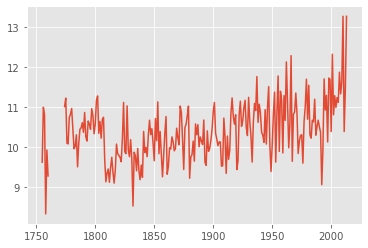

In [27]:
a = df_an['dt'].apply(lambda x: int(x[0:4]))
grouped = df_an.groupby(a).mean()
grouped.head(10)
plt.plot(grouped['AverageTemperature'])
plt.show()

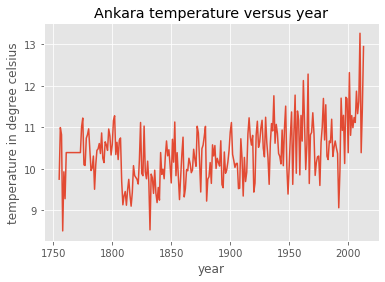

In [28]:
df_an['AverageTemperature'] = df_an['AverageTemperature'].fillna(df_an['AverageTemperature'].mean())
grouped = df_an.groupby(a).mean()
plt.plot(grouped['AverageTemperature'])
plt.xlabel('year')
plt.ylabel('temperature in degree celsius')
plt.title('Ankara temperature versus year')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression as LinReg
x= grouped.index.values.reshape(-1,1)
y = grouped['AverageTemperature'].values

In [30]:
reg = LinReg()
reg.fit(x,y)
y_preds = reg.predict(x)
Accuracy = str(reg.score(x,y))
print(Accuracy)

0.15253155211068858


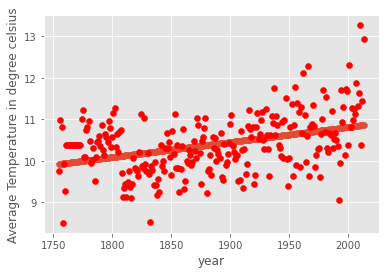

In [31]:
plt.scatter(x=x, y=y_preds)
plt.scatter(x=x,y=y, c='r')
plt.ylabel('Average Temperature in degree celsius')
plt.xlabel('year')
plt.show()

In [32]:
reg.predict([[2024],[2021],[3000]])

array([10.90303267, 10.89213733, 14.44764686])